In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Bag of Words analysis using WordCloud
* Perform distribution analysis on text columns using
  * No of characters per document
  * No of words per document

* Visualize bag of words analysis using words clouds

In [ ]:
import pandas as pd, nltk, matplotlib.pyplot as plt, re
from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
downloaded = drive.CreateFile({'id':'14zC4gTdxg8CqoSb4bYLv0Shb31gaLRul'}) # replace the id with id of file you want to access
downloaded.GetContentFile('narendramodi_tweets.csv') 

In [ ]:
data = pd.read_csv('narendramodi_tweets.csv')
data.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


## Identify no of characters per document

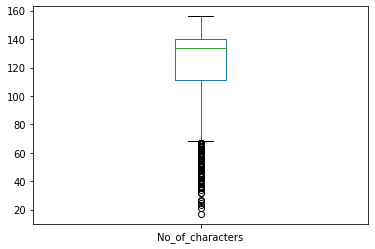

In [ ]:

data['No_of_characters'] = data['text'].str.len() # here len fn will count no of characters in a string
data['No_of_characters'].plot.box()

In [ ]:
data.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,No_of_characters
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,136
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,133
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,66
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,71
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,81


## Calculate no of words per document

In [ ]:
data['text'].str.split().head() # 1st Split the string 

0    [The, President's, address, wonderfully, encap...
1    [Rashtrapati, Ji's, address, to, both, Houses,...
2    [RT, @PMOIndia:, Empowering, the, marginalised...
3    [RT, @PMOIndia:, Commitment, to, welfare, of, ...
4    [RT, @PMOIndia:, Improving, the, quality, of, ...
Name: text, dtype: object

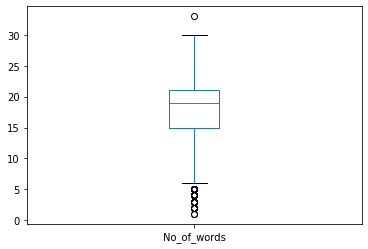

In [ ]:
data['No_of_words'] = data['text'].str.split().str.len()
data['No_of_words'].plot.box()

* Median line is at 18 so, approx 18 words are used from this user profile
* Certain no of words are below the whisker of approx 6, which displays outliers

In [ ]:
data.head() 

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,No_of_characters,No_of_words
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,136,14
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,133,16
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,66,6
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,71,8
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,81,11


# Identify no of hashtags in each document

In [ ]:
data['text'].str.lower().str.findall('#[a-z0-9]+')[:15]

0      [#transformingindia]
1                        []
2                        []
3                        []
4                        []
5                        []
6            [#presidentmu]
7     [#presidentmukherjee]
8                        []
9                     [#pr]
10                       []
11    [#presidentmukherjee]
12                       []
13    [#presidentmukherjee]
14                       []
Name: text, dtype: object

In [ ]:
data['No_of_hashtags'] = data['text'].str.lower().str.findall('#[a-z0-9]+')

In [ ]:
data['No_of_hashtags'] = data['text'].str.lower().str.findall('#[a-z0-9]+').str.len()

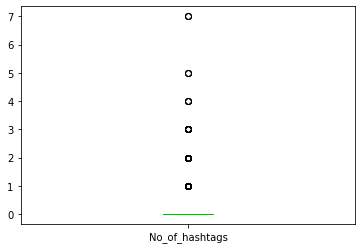

In [ ]:
data['No_of_hashtags'].plot.box()

* IQR is at zero
* Outliers displays there are tweets which contains more than 5 hashtags also

In [ ]:
data.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,No_of_characters,No_of_words,No_of_hashtags
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,136,14,1
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,133,16,0
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,66,6,0
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,71,8,0
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,81,11,0


In [ ]:
for x in data[data['No_of_hashtags']>5]['text']: # Filtering no of rows with > 5 hashtags by text cols
  print(x)
  print('-'*len(x))

RT @aintprateek: #Sandesh2Soldiers #IndianArmy #indianairforce #NarendraModi #indiannavy #Bordersecurityforces #paramilitaryforces https://…
--------------------------------------------------------------------------------------------------------------------------------------------
RT @srikidambi: What a day it is, a selfie with our @PMOIndia.#sendoff #olympians #modi #primeminister #selfie #greatfeeling #lucky https:/…
--------------------------------------------------------------------------------------------------------------------------------------------
RT @NrawatSingh: Time to meet Hon'ble Prime Minister 󾬸 #selfie #selfienation @unlim_likes #unlimlikes #selfies #me #love #pretty... https:/…
--------------------------------------------------------------------------------------------------------------------------------------------


# Bag of word analysis - WordCloud
* To further summarize text cols we use bow
* We calculate all the unique tokens in a corpus and identify their frequency
* We then visualize them in the form of bar chart/WordCloud 

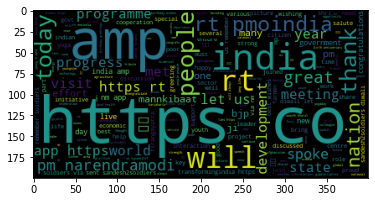

In [ ]:
docs = data['text'].str.lower()
wc = WordCloud().generate(' '.join(docs)) #joining the strings together from docs to form a single string and passing it to WordCloud fn through generate method.
plt.imshow(wc) 

# Change the Aesthetics -
* Change bg color to white
* Remove xticks and yticks

([], <a list of 0 Text major ticklabel objects>)

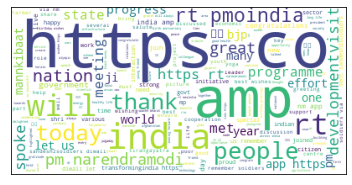

In [ ]:
docs1 = data['text'].str.lower()
wc1 = WordCloud(background_color='white').generate(' '.join(docs1))
plt.imshow(wc1)
plt.xticks([])
plt.yticks([])  

In [ ]:
# Count frequency of words
wc.words_

{'across india': 0.012181616832779624,
 'afghanistan': 0.017718715393133997,
 'agriculture': 0.01716500553709856,
 'always': 0.015503875968992248,
 'amp': 0.7491694352159468,
 'app https': 0.03322259136212625,
 'area': 0.014396456256921373,
 'assam': 0.01716500553709856,
 'athlete': 0.011627906976744186,
 'benefit': 0.017718715393133997,
 'best': 0.019933554817275746,
 'best wishes': 0.019933554817275746,
 'birth anniversary': 0.018272425249169437,
 'birthday greetings': 0.014396456256921373,
 'birthday wishes': 0.016611295681063124,
 'bjp': 0.029346622369878183,
 'black money': 0.012181616832779624,
 'bring': 0.02159468438538206,
 'building': 0.011627906976744186,
 'celebration': 0.017718715393133997,
 'centre': 0.018272425249169437,
 'citizen': 0.023809523809523808,
 'cm': 0.017718715393133997,
 'co tyuxnnjfif': 0.014396456256921373,
 'colleague': 0.012181616832779624,
 'come': 0.011627906976744186,
 'congrats': 0.01273532668881506,
 'congratulate': 0.01273532668881506,
 'congratulat

* WordCloud will be able to identify bigrams and ngrams like 'people people', 'pm narendramodi' etc.

# Retain only unigrams - 
* Using collocations=False 
* Remove custom stopwords

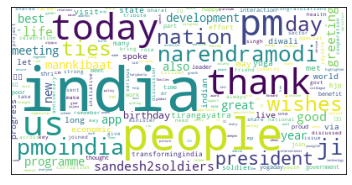

In [ ]:
docs = data['text'].str.lower().str.replace('http\S+', '') # Removing URLs
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['https', 'rt', 'rs', 'link', 'amp', 'co'])
wc = WordCloud(background_color='white',
               collocations=False,
               stopwords=stopwords).generate(' '.join(docs)) 
plt.xticks([])
plt.yticks([])  
plt.imshow(wc)

In [ ]:
# For numerical cols - distribution analysis to summarize the numerical cols
# For categorical cols - frequency analysis to summarize the cat cols in simple bar chart
# For text cols - WordCloud is used to summarize and identify the imp terms which are frequently appearing in our corpus 

# Twitter Hashtag Analysis_demovid6
* In the above cells we performed BOW analysis for all words
* From now on we will only look for those words which are of type hashtags and print wordcloud for those alone

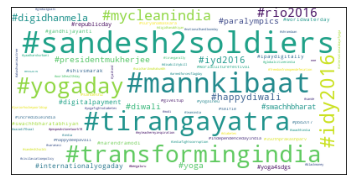

In [ ]:
docs2 = data['text'].str.lower()
wc = WordCloud(background_color='white',
               regexp = '#[a-z0-9]+', # Extracting only hashtags values and then perform BOW analysis on top of hashtags
               collocations=False).generate(' '.join(docs2))
plt.xticks([])
plt.yticks([])  
plt.imshow(wc)

### Hashtag analysis 
* Loop through all the tweets and then check for a particular hashtag 

In [ ]:
hashtag1 = "#mannkibaat"
data[hashtag1] = data['text'].str.lower().apply(lambda x : 1 if hashtag1 in x else 0)
data[hashtag1].sum()

94

In [ ]:
data.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,No_of_characters,No_of_words,No_of_hashtags,#mannkibaat
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,136,14,1,0
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,133,16,0,0
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,66,6,0,0
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,71,8,0,0
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,81,11,0,0


In [ ]:
data['text'][20]

"Get your e-book on tension-free exams &amp; personalised exam greetings.  Don't forget to register. https://t.co/TYuxNNJfIf #MannKiBaat"

### Get monthwise count 
* perform a trending analysis on above cell 

In [ ]:
hashtag2 = "#mannkibaat" # Count how many times this hashtag appeared in a particular month
data[hashtag2] = data['text'].str.lower().apply(lambda x : 1 if hashtag2 in x else 0)
data['created_at'] = pd.to_datetime(data['created_at'], format='%Y-%m-%d %H:%M:%S') # converting the col to datetime for easy trending analysis
data.resample(on='created_at', rule='1m')[hashtag2].sum() # using 

created_at
2016-03-31     4
2016-04-30     9
2016-05-31     8
2016-06-30    19
2016-07-31     9
2016-08-31    12
2016-09-30     4
2016-10-31     5
2016-11-30     5
2016-12-31     9
2017-01-31    10
Freq: M, Name: #mannkibaat, dtype: int64

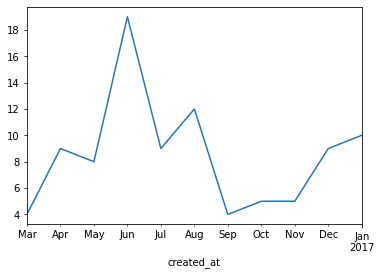

In [ ]:
data.resample(on='created_at', rule='1m')[hashtag2].sum().plot.line() # using resample fn and specifying the rule for trend as year/month/day/hour wise

# Explore monthwise count for multiple hashtags

In [ ]:
data['year_month'] = data['created_at'].dt.strftime('%Y-%m') # Extracting the year-month from 'created_at'   col
data['year_month'].head()

0    2017-01
1    2017-01
2    2017-01
3    2017-01
4    2017-01
Name: year_month, dtype: object

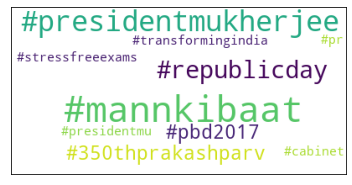

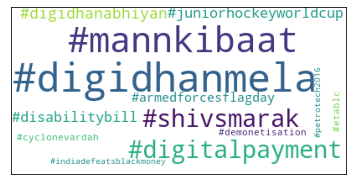

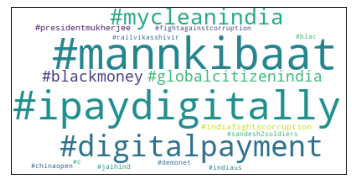

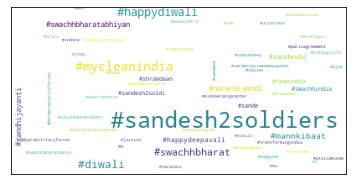

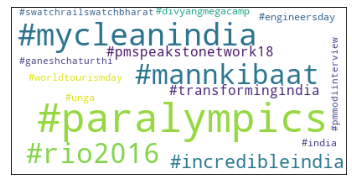

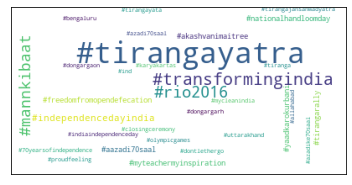

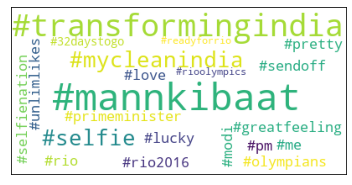

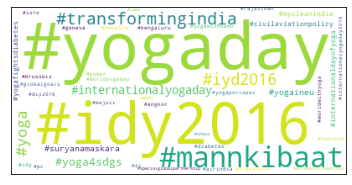

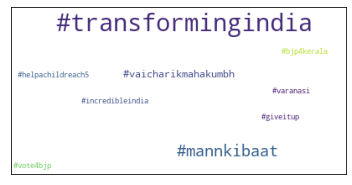

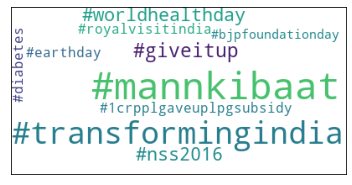

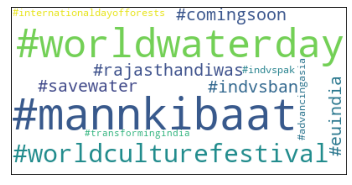

In [ ]:
months = data['year_month'].unique()
for x in months:
  subset = data[data['year_month']==x]
  docs4 = subset['text'].str.lower()
  wc4 = WordCloud(background_color='white',
                regexp='#[a-z0-9]+',
                collocations=False).generate(' '.join(docs4))
  plt.figure()
  plt.xticks([])
  plt.yticks([])
  plt.imshow(wc4)

In [ ]:
?